In [ ]:
#Import the libraries
# data processing
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


#For Sampling
from sklearn.utils import resample


#Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")


# EDA

In [ ]:
term_deposit_data = pd.read_csv('/content/term-deposit-marketing-2020.csv')



In [ ]:
term_deposit_data.head().style.background_gradient(cmap='Dark2_r')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


All coloured columns are numerical columns

White column indicates categorical variable

In [ ]:
term_deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
print("Number of rows in dataset is = ",term_deposit_data.shape[0], " \nNumber of columns in dataset is = " , term_deposit_data.shape[1])

Number of rows in dataset is =  40000  
Number of columns in dataset is =  14


In [ ]:
#Missing values analysis
term_deposit_data.isnull().sum().sum()

0

No missing values analysis in the dataset

In [ ]:
#Statistical Analysis of Numerical Columns
df_num_col = term_deposit_data.select_dtypes(exclude=['object']).columns
df_num = term_deposit_data[df_num_col]
df_num.head()




,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [ ]:
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,40000.000000,40.544600,9.641776,19.000000,33.000000,39.000000,48.000000,95.000000
balance,40000.000000,1274.277550,2903.769716,-8019.000000,54.000000,407.000000,1319.000000,102127.000000
day,40000.000000,16.017225,8.278127,1.000000,8.000000,17.000000,21.000000,31.000000
duration,40000.000000,254.824300,259.366498,0.000000,100.000000,175.000000,313.000000,4918.000000
campaign,40000.000000,2.882175,3.239051,1.000000,1.000000,2.000000,3.000000,63.000000


balance have the lowest mean of -8019 euros while age have the highest mean of 19 years.

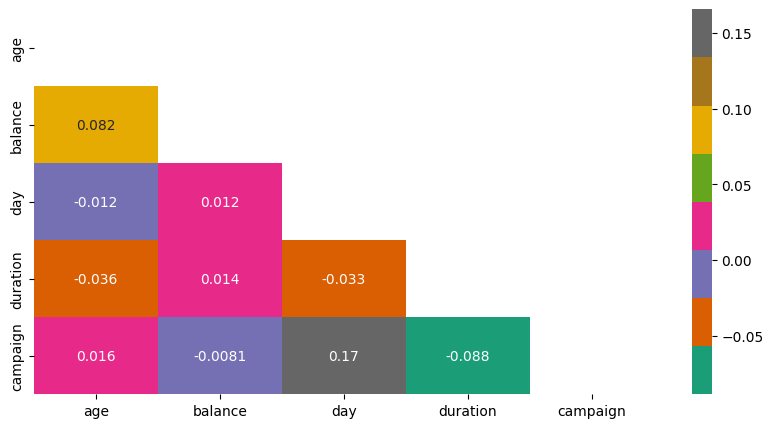

In [ ]:
#Heat Map for correlation
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2');

No high correlation between the numerical features

In [ ]:
#Target Analysis & Visualization
term_deposit_data['y'].value_counts()



no     37104
yes     2896
Name: y, dtype: int64

In [ ]:
Total= len(term_deposit_data['y'])
print(Total)

40000


In [ ]:
#percentage distribution

percent_y_no = len(term_deposit_data[term_deposit_data['y']=="no"])/Total
print("Percentage of y_no is: ",percent_y_no*100)

percent_y_yes = len(term_deposit_data[term_deposit_data['y']=="yes"])/Total
print("Percentage of y_no is: ",percent_y_yes*100)

Percentage of y_no is:  92.75999999999999
Percentage of y_no is:  7.24


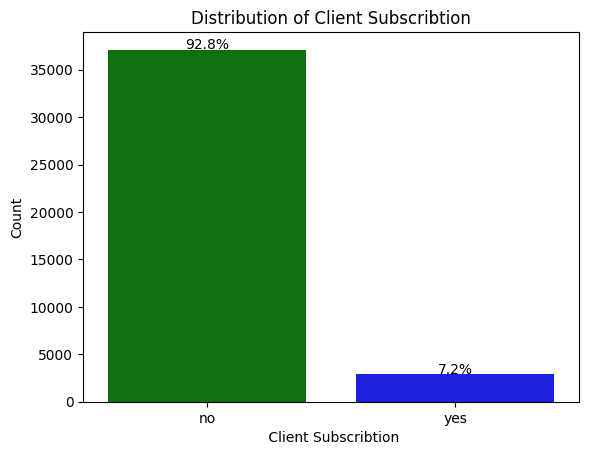

In [ ]:
colors=["green", "blue"]

ax=sns.countplot(x='y', data=term_deposit_data, palette=colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, f'{height/Total:.1%}', ha="center")

#set lables and titles
plt.xlabel(' Client Subscribtion')
plt.ylabel('Count')
plt.title('Distribution of Client Subscribtion')

plt.show()

92.8% of target belong to class with respose no and only 7.2% belong to response 1 class. which clearly shows classes are imbalanced.

Before training the model,resampling the minority class if require and anding class weights to the models in favour of the minority class.

In [ ]:
# Feature Visualization
#function for the categorical data
def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=term_deposit_data, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()



In [ ]:
# Feature Visualization wrt target feature
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='y', col=feature, kind='count', data=term_deposit_data, palette="cool_r");
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

In [ ]:
#function for the numerical data
def hist_feat(feature):
    plt.figure(figsize=(10, 3))
    sns.histplot(term_deposit_data[feature],kde=True,color='purple',bins=30)



def dist_feat_w_target(feature):
    sns.displot(data=term_deposit_data, x=feature,hue='y',kind ='kde')

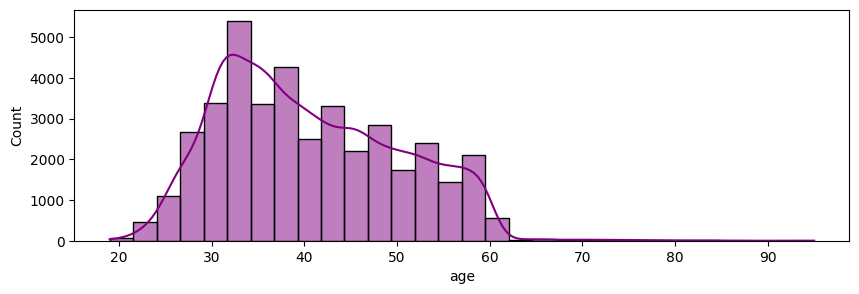

In [ ]:
#age
hist_feat('age')


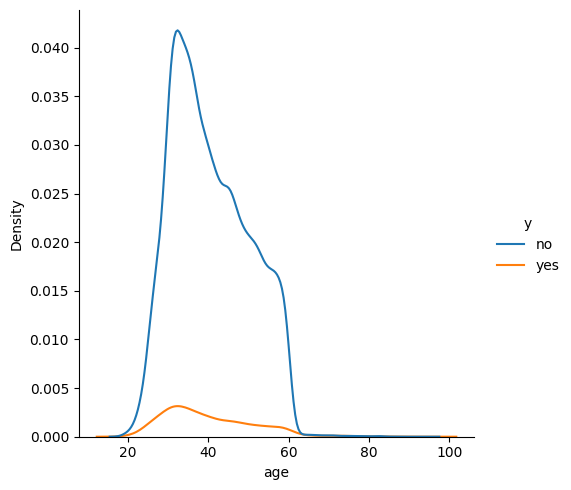

In [ ]:

dist_feat_w_target('age')

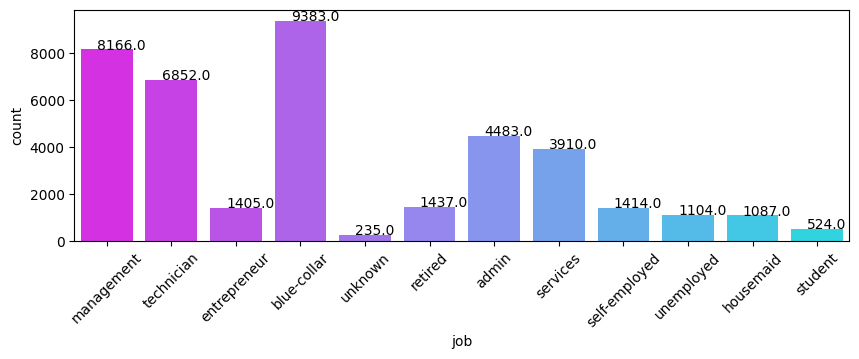

In [ ]:
#job
feature_plot('job')



<Figure size 1000x300 with 0 Axes>

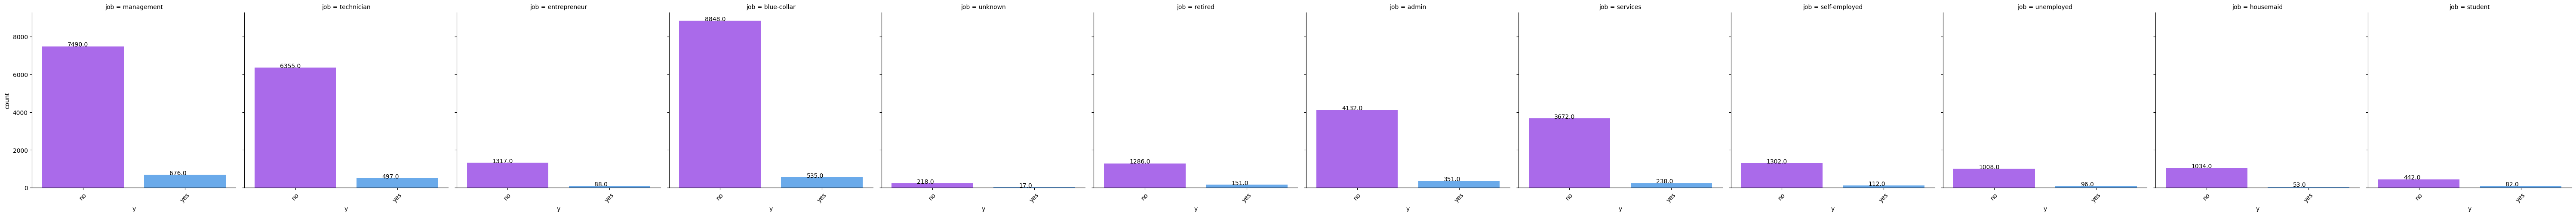

In [ ]:
feature_plot_with_target('job')

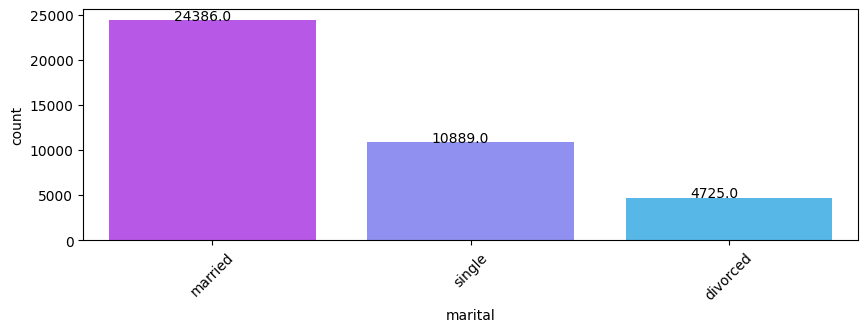

In [ ]:
#marital
feature_plot('marital')

<Figure size 1000x300 with 0 Axes>

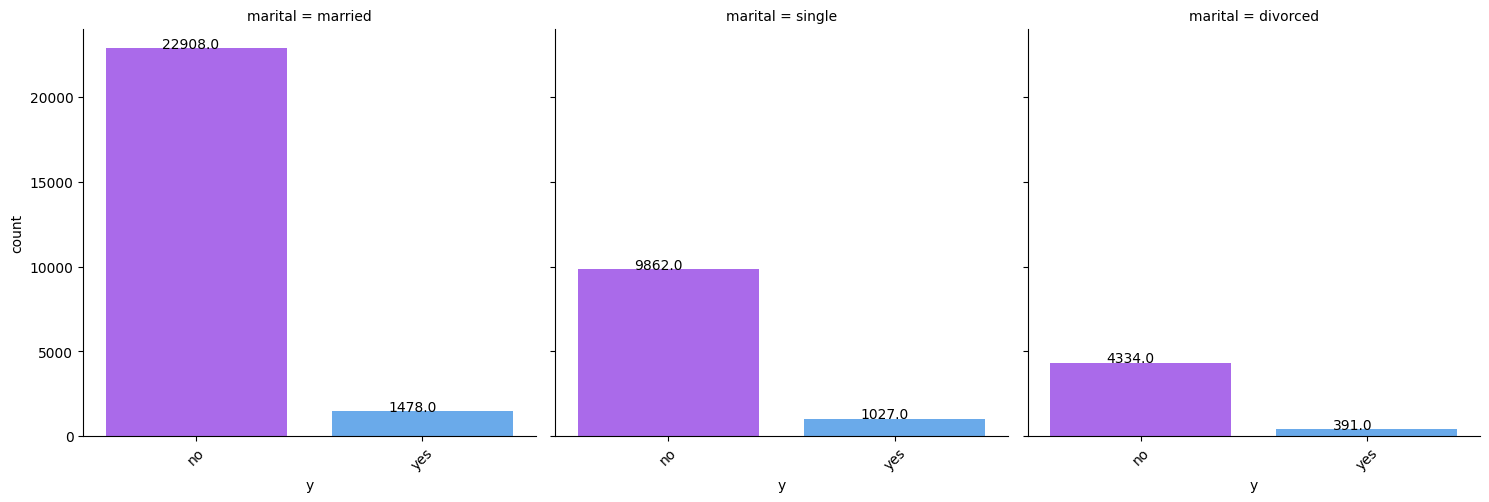

In [ ]:
feature_plot_with_target('marital')

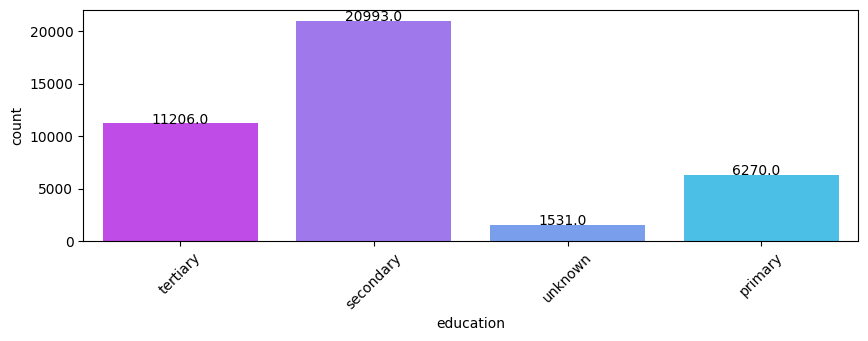

In [ ]:
#education
feature_plot('education')

<Figure size 1000x300 with 0 Axes>

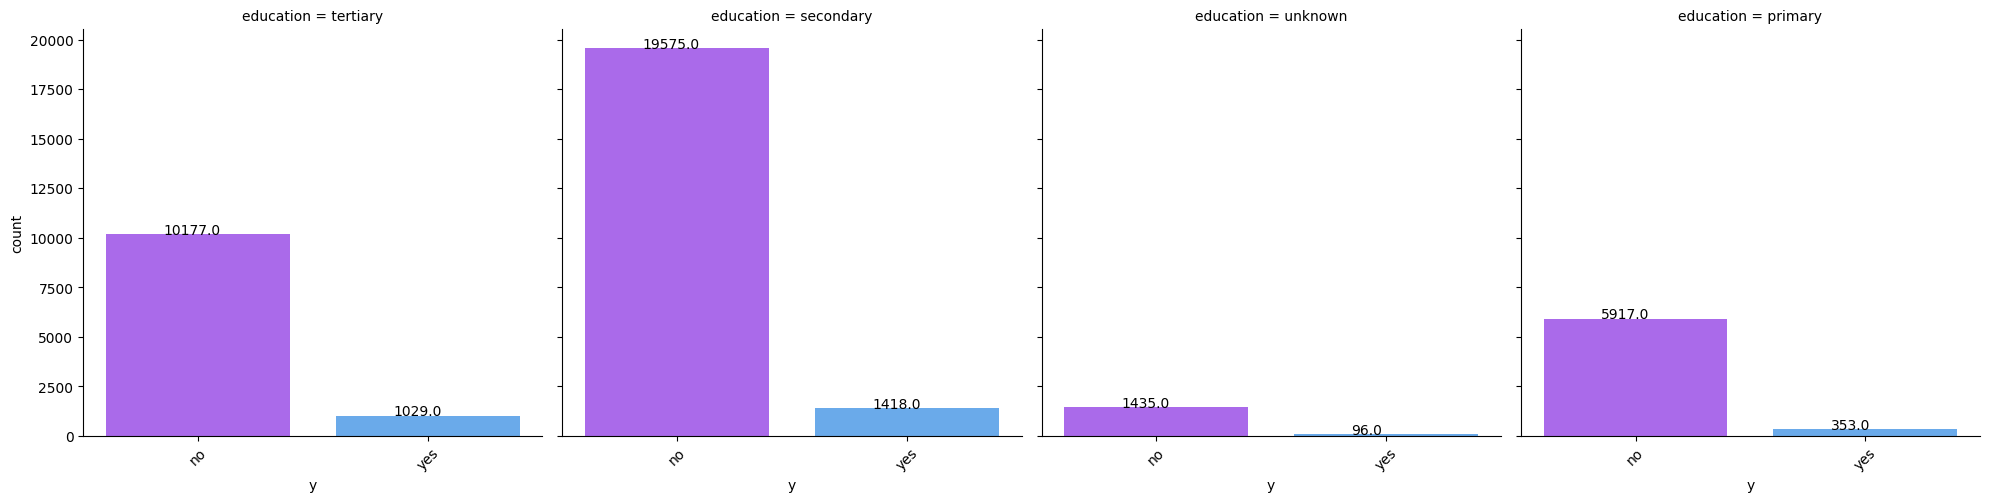

In [ ]:
feature_plot_with_target('education')

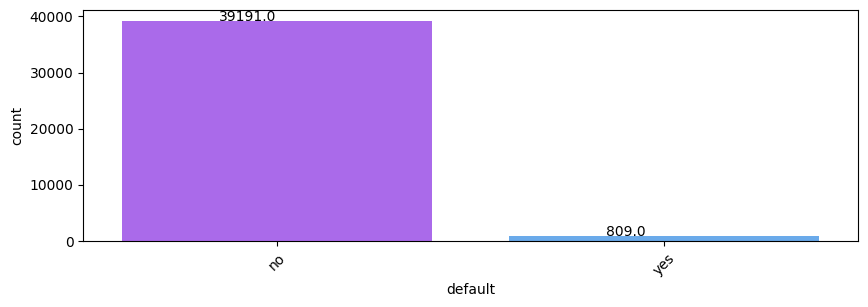

In [ ]:
#default
feature_plot('default')

<Figure size 1000x300 with 0 Axes>

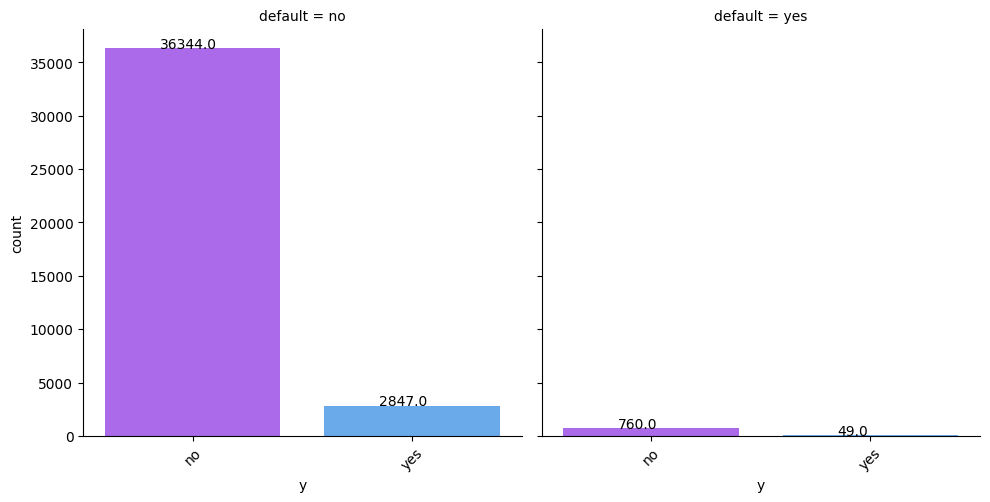

In [ ]:
feature_plot_with_target('default')

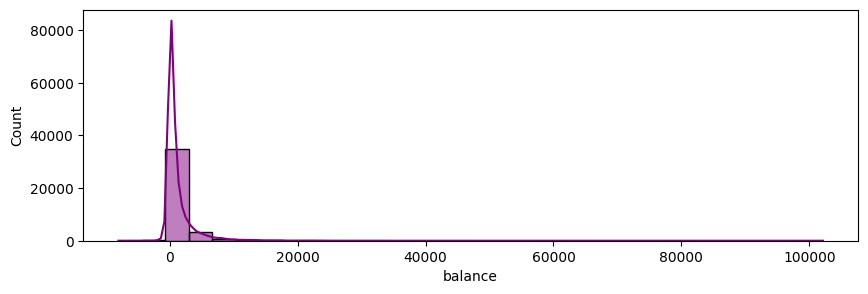

In [ ]:
#balance
hist_feat('balance')

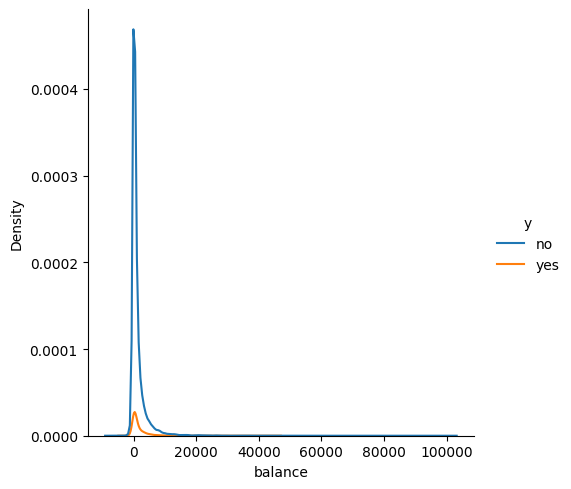

In [ ]:
dist_feat_w_target('balance')

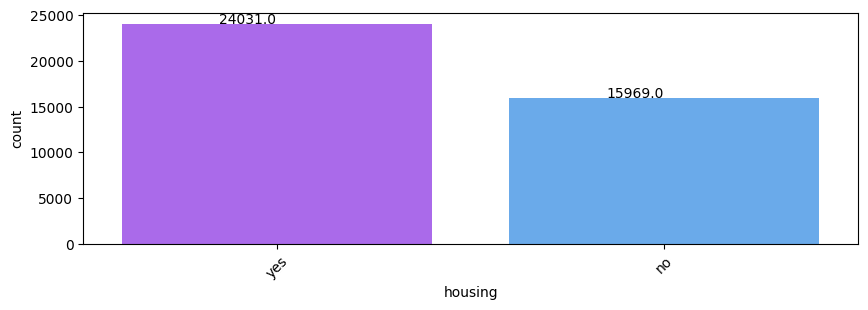

In [ ]:
#housing
feature_plot('housing')

<Figure size 1000x300 with 0 Axes>

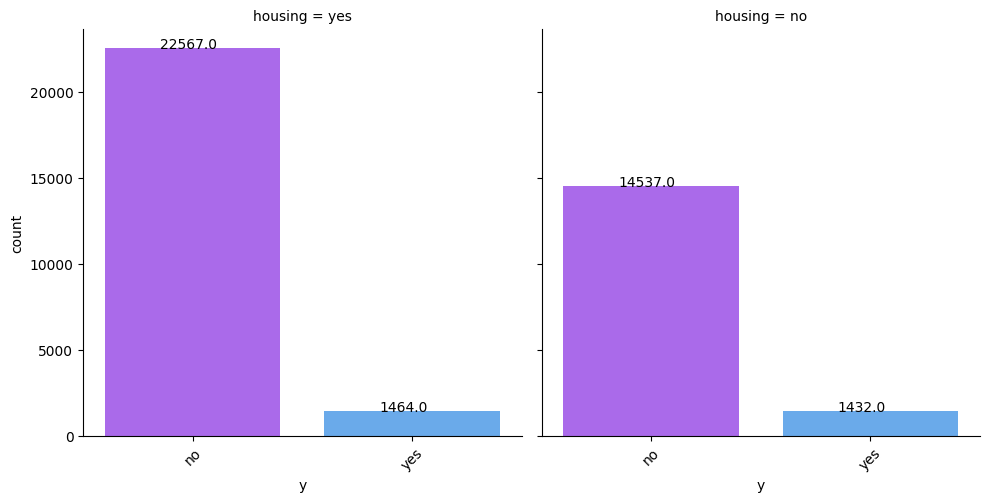

In [ ]:
feature_plot_with_target('housing')

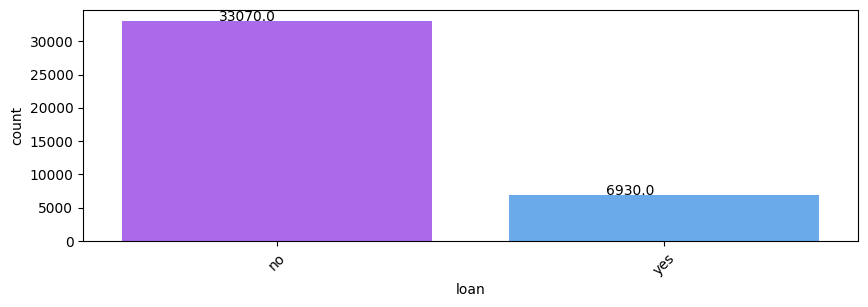

In [ ]:
#loan
feature_plot('loan')

<Figure size 1000x300 with 0 Axes>

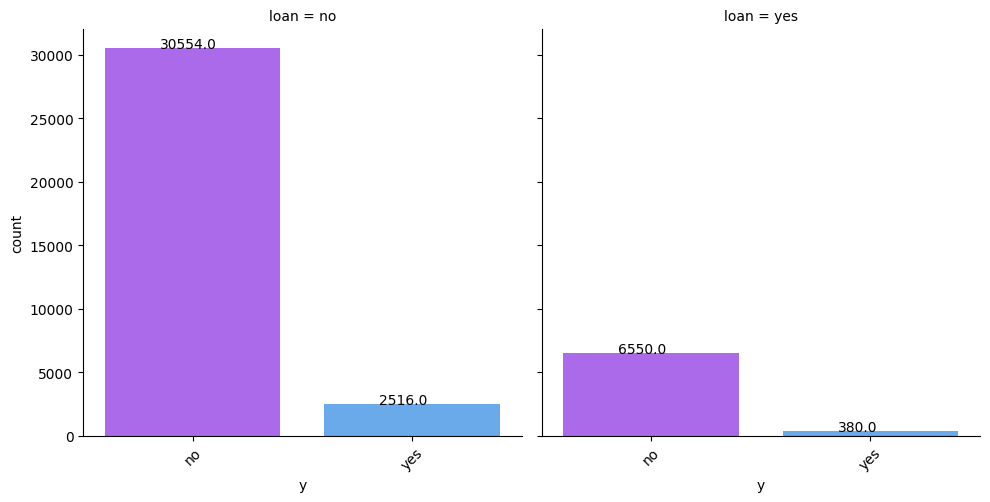

In [ ]:
feature_plot_with_target('loan')

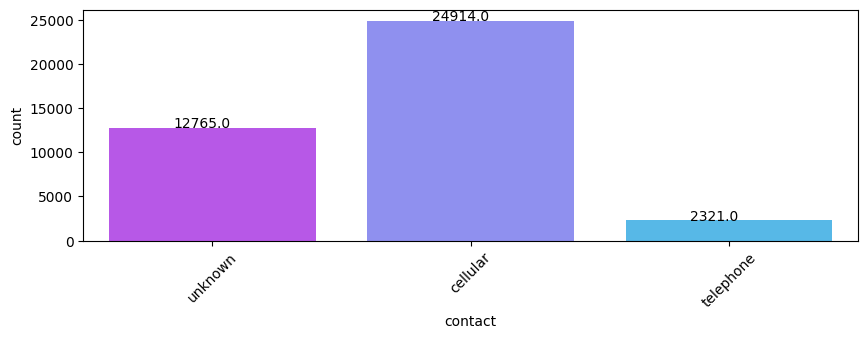

In [ ]:
#contact
feature_plot('contact')

<Figure size 1000x300 with 0 Axes>

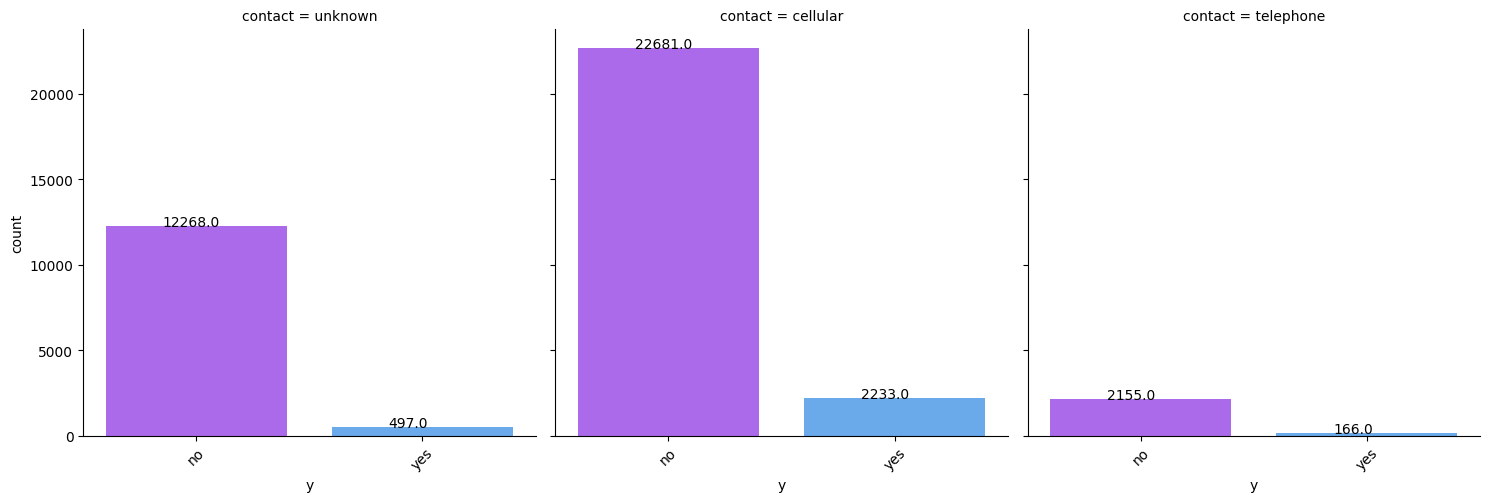

In [ ]:
feature_plot_with_target('contact')

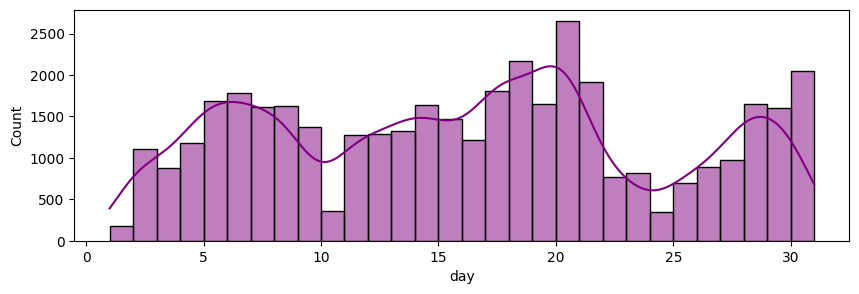

In [ ]:
#day
hist_feat('day')

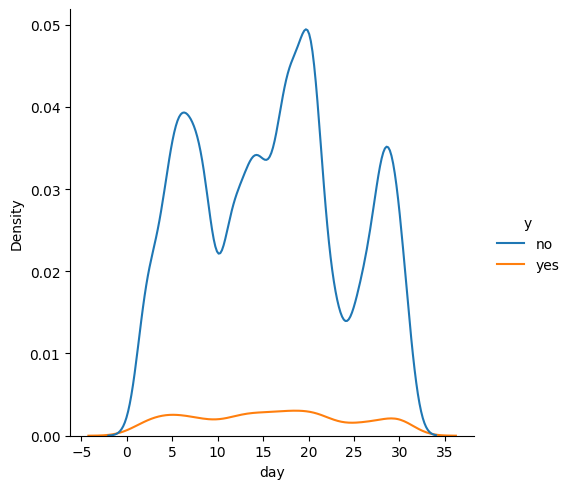

In [ ]:
dist_feat_w_target('day')

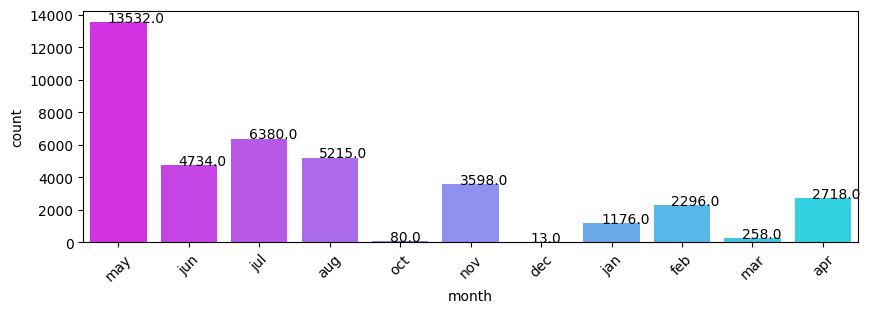

In [ ]:
#month
feature_plot('month')

<Figure size 1000x300 with 0 Axes>

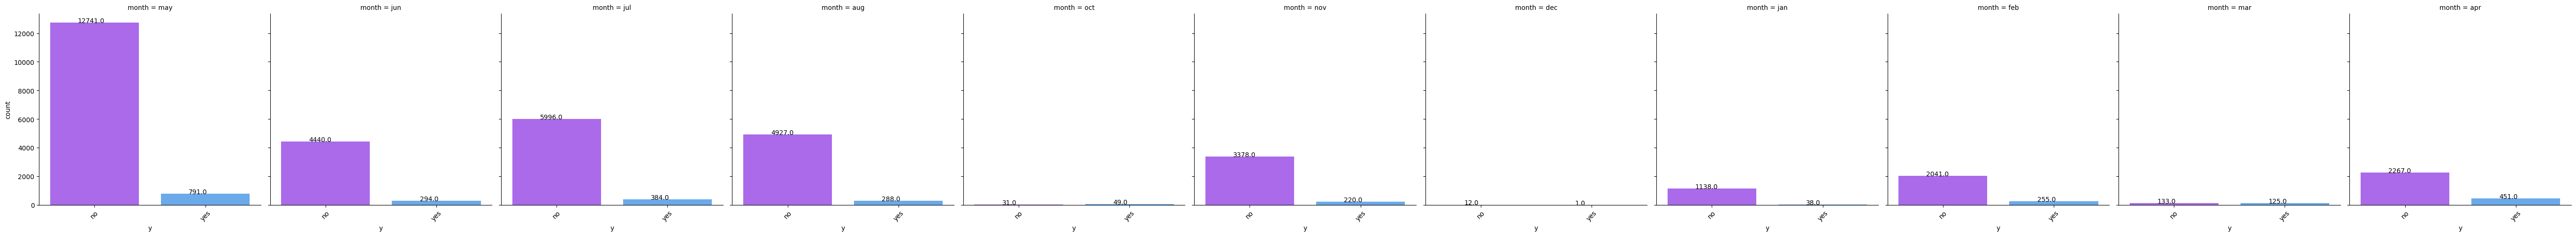

In [ ]:
feature_plot_with_target('month')

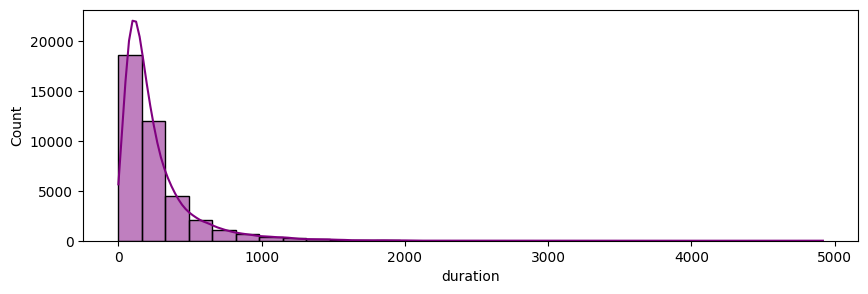

In [ ]:
#duration
hist_feat('duration')

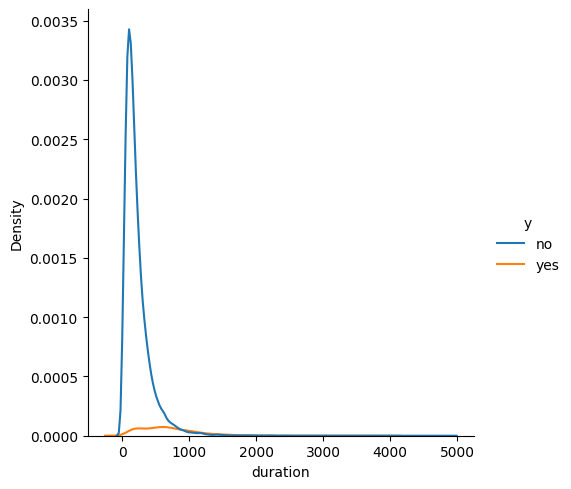

In [ ]:
dist_feat_w_target('duration')

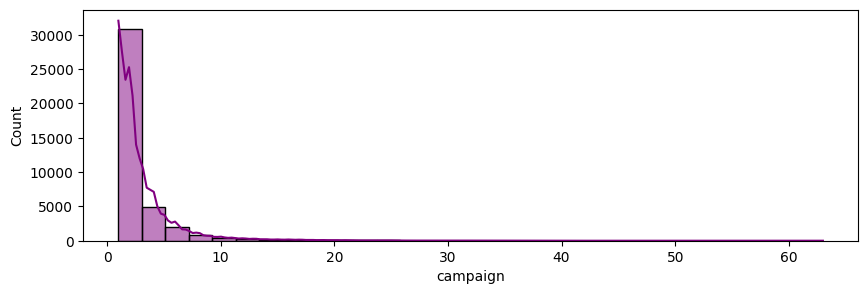

In [ ]:
#campaign
hist_feat('campaign')

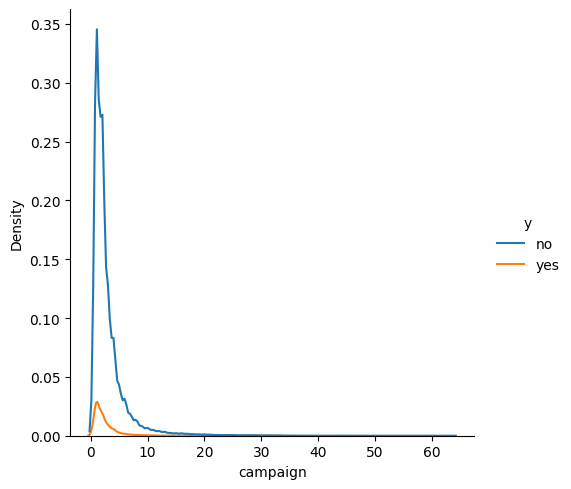

In [ ]:
dist_feat_w_target('campaign')

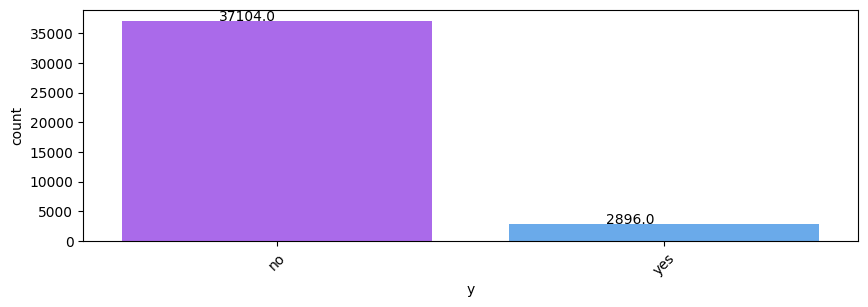

In [ ]:
feature_plot('y')

The distribution of the independent features with respect to target variable shows futher how imbalanced the dataset is.



Text(0.5, 1.0, 'Top 5 month ')

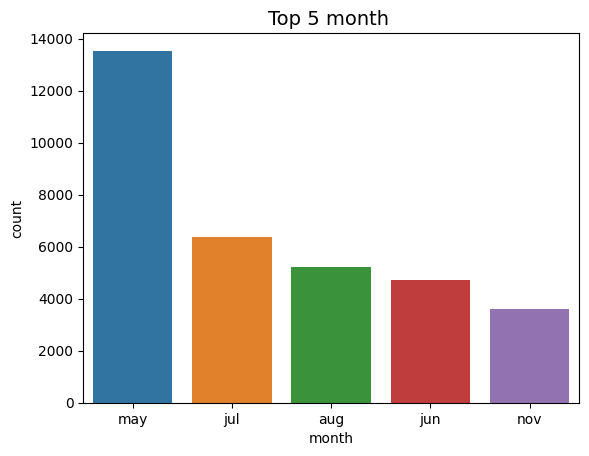

In [ ]:
#Top 5 months
sns.countplot(x = 'month',data=term_deposit_data, order=term_deposit_data.month.value_counts().iloc[:5].index)
plt.title('Top 5 month ', fontsize=14)

The month of may had the highest number of customers who were contacted

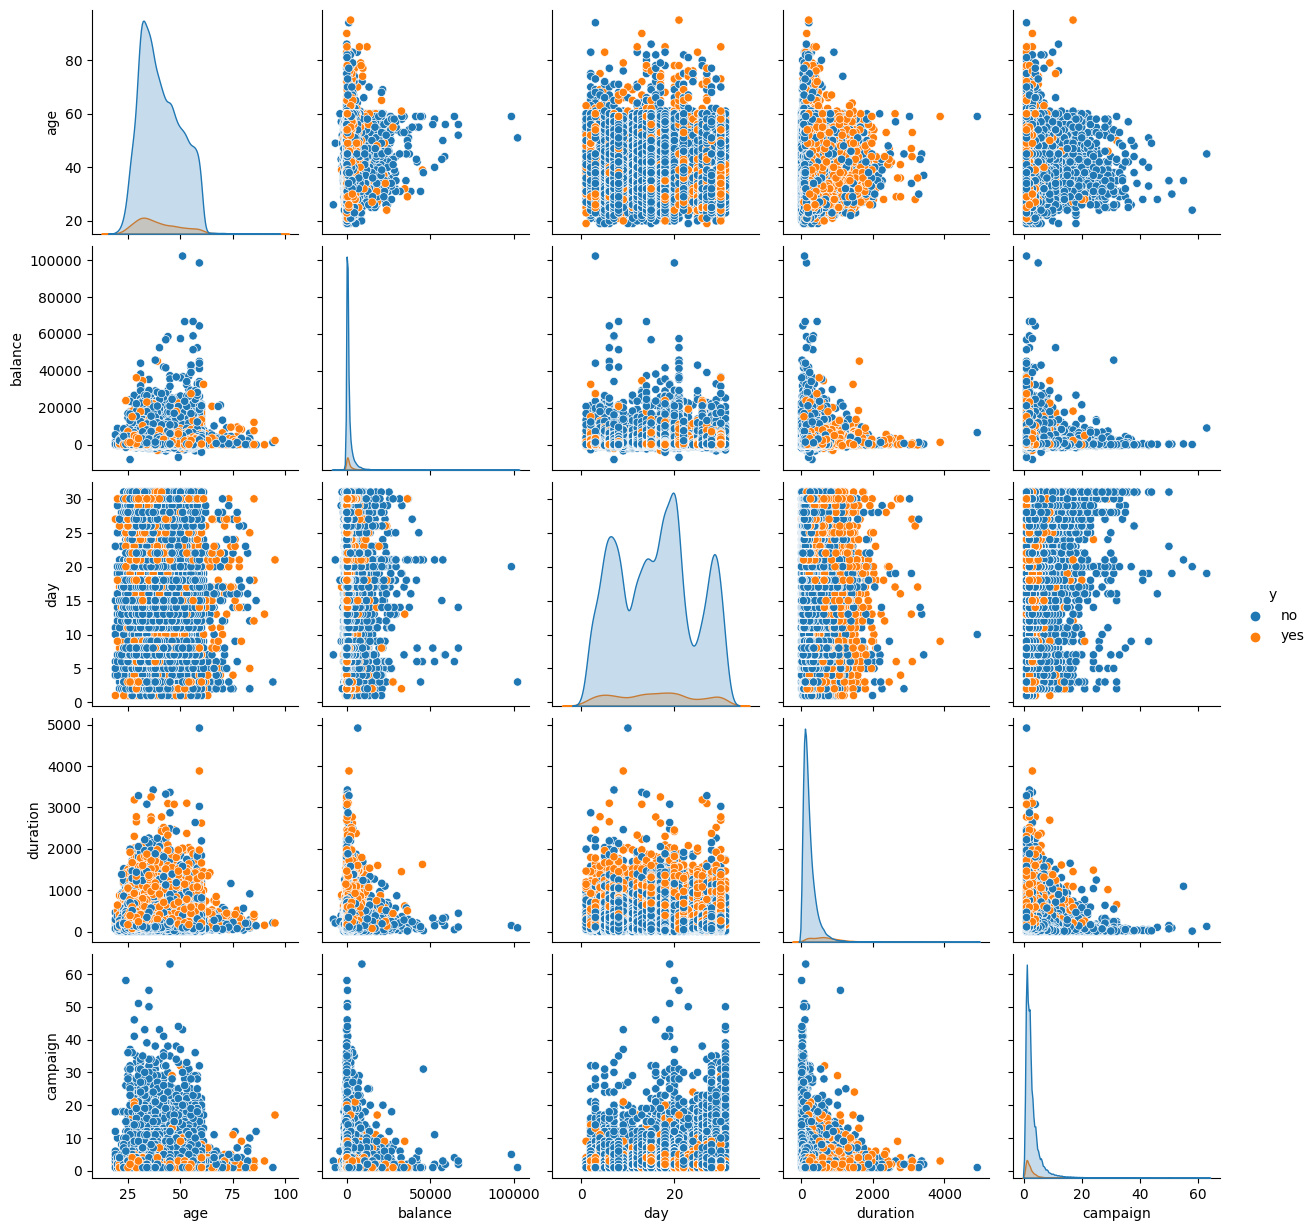

In [ ]:
sns.pairplot(term_deposit_data,hue="y")

# Data Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

X = term_deposit_data.drop(['y'], axis=1)
y = term_deposit_data['y']

X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1


In [ ]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [ ]:
mapping = {'yes': 1, 'no': 0}

# Map the values using the map() function
y = y.map(mapping)
print(y)




0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64


In [ ]:
#One-hot encoding
X = pd.get_dummies(X)

# Convert X to DataFrame
X = pd.DataFrame(X)

X.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Splitting data set to training and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)



(32000, 44)
(8000, 44)
(32000,)
(8000,)


In [ ]:
#Resampling minority data

data_train = pd.concat([X_train,y_train],axis=1)

# Separate majority and minority classes
df_majority = data_train[data_train['y']==0]
df_minority = data_train[data_train['y']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=int(len(df_minority)*4),
random_state=1) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.reset_index(inplace=True, drop=True)

The upsampling of the minority class.Multiplied the minority class by four.

In [ ]:
y_train.value_counts()

0    29680
1     2320
Name: y, dtype: int64

In [ ]:
df_upsampled["y"].value_counts()


0    29680
1     9280
Name: y, dtype: int64

the majority class is now 3 times the minority class

In [ ]:
X_train = df_upsampled.drop(['y'], axis=1)
y_train = df_upsampled['y']

print(X_train.shape)
print(y_train.shape)

(38960, 44)
(38960,)


# Models Training and evaluation

1.Adding Class weights in ration of 1:3 thrice the weight to class '1'

In [ ]:
#xgboost model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


class_weights = np.array([1, 3])
xgb_model = XGBClassifier(scale_pos_weight=class_weights[1],
random_state=42)
#thrice the weight to class '1'.
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[6873  551]
 [ 133  443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7424
           1       0.45      0.77      0.56       576

    accuracy                           0.91      8000
   macro avg       0.71      0.85      0.76      8000
weighted avg       0.94      0.91      0.92      8000



In [ ]:
#Logistic Regression Model
class_weights = {0: 1, 1: 3}
log_model = LogisticRegression(class_weight=class_weights,
random_state=42)
#thrice the weight to class '1'.
log_model.fit(X_train, y_train)

y_pred =log_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6288 1136]
 [ 113  463]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7424
           1       0.29      0.80      0.43       576

    accuracy                           0.84      8000
   macro avg       0.64      0.83      0.67      8000
weighted avg       0.93      0.84      0.87      8000



In [ ]:
#Random Forest Classifier Model
rf_model = RandomForestClassifier(class_weight=class_weights,
random_state=123)

rf_model.fit(X_train, y_train)

y_pred =rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7261  163]
 [ 354  222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7424
           1       0.58      0.39      0.46       576

    accuracy                           0.94      8000
   macro avg       0.77      0.68      0.71      8000
weighted avg       0.93      0.94      0.93      8000



In [ ]:
#Decision Tree Model
dt_model = DecisionTreeClassifier(class_weight=class_weights,
random_state=42)
#thrice the weight to class '1'.
dt_model.fit(X_train, y_train)

y_pred =dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7108  316]
 [ 344  232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7424
           1       0.42      0.40      0.41       576

    accuracy                           0.92      8000
   macro avg       0.69      0.68      0.68      8000
weighted avg       0.92      0.92      0.92      8000



In [ ]:
#Perceptron
perceptron = Perceptron(class_weight=class_weights,
random_state=42,max_iter=50)

perceptron.fit(X_train, y_train)

y_pred =perceptron.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[5624 1800]
 [ 105  471]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7424
           1       0.21      0.82      0.33       576

    accuracy                           0.76      8000
   macro avg       0.59      0.79      0.59      8000
weighted avg       0.93      0.76      0.82      8000



In [ ]:
#Stochastic Gradient Classifier model
sgd = SGDClassifier(class_weight=class_weights,
random_state=42,max_iter=50, tol=None)

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6867  557]
 [ 463  113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7424
           1       0.17      0.20      0.18       576

    accuracy                           0.87      8000
   macro avg       0.55      0.56      0.56      8000
weighted avg       0.88      0.87      0.88      8000



In [ ]:
#Linear SVC  model
linearSvc = LinearSVC(class_weight=class_weights,
random_state=42,max_iter=50)

linearSvc.fit(X_train, y_train)

y_pred = linearSvc.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5281 2143]
 [  62  514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      7424
           1       0.19      0.89      0.32       576

    accuracy                           0.72      8000
   macro avg       0.59      0.80      0.57      8000
weighted avg       0.93      0.72      0.79      8000



The best two model are XGboost and Random Forest classifier with minority class F1 score value  of 56% and 47% respectively

# Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1),
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
xgb_tuned = random_search.best_estimator_

# Train the model with the best hyperparameters
xgb_tuned.fit(X_train, y_train)

# Use the best model for predictions
y_pred = xgb_tuned.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7065  359]
 [ 202  374]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7424
           1       0.51      0.65      0.57       576

    accuracy                           0.93      8000
   macro avg       0.74      0.80      0.77      8000
weighted avg       0.94      0.93      0.93      8000



In [ ]:

#Random Forest
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
rf_tuned = random_search.best_estimator_

# Train the model with the best hyperparameters
rf_tuned.fit(X_train, y_train)

# Use the best model for predictions
y_pred1 = rf_tuned.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Confusion Matrix:
[[7082  342]
 [ 198  378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7424
           1       0.53      0.66      0.58       576

    accuracy                           0.93      8000
   macro avg       0.75      0.81      0.77      8000
weighted avg       0.94      0.93      0.94      8000



The f1 score for the minority score increased after the fine tuning.For xgboost from 56%to 57% and 46% to 58% for the Random forest.

# Probability prediction of classes

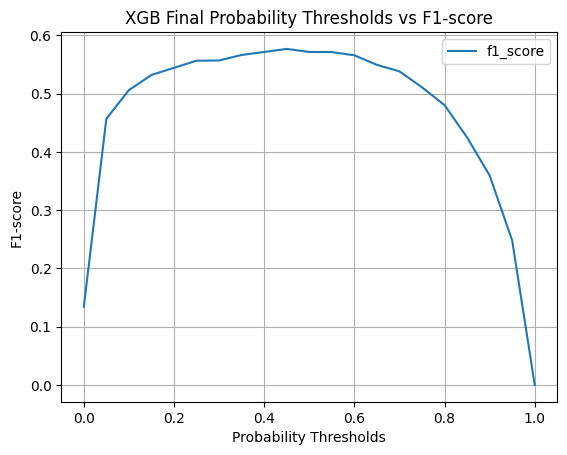

In [ ]:
#XGboost
from sklearn.metrics import f1_score
thresholds = np.arange(21)*0.05
f1_scores = []

y_proba = xgb_tuned.predict_proba(X_test)[:,1]

for thres in thresholds:
    y_pred = np.where(y_proba > thres, 1, 0)
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure()
plt.plot(thresholds, f1_scores, label='f1_score')
plt.xlabel('Probability Thresholds')
plt.ylabel('F1-score')
plt.title('XGB Final Probability Thresholds vs F1-score')
plt.legend()
plt.grid()
plt.show()



The probality threshhod of 0.45 gives the best value of F1 score.

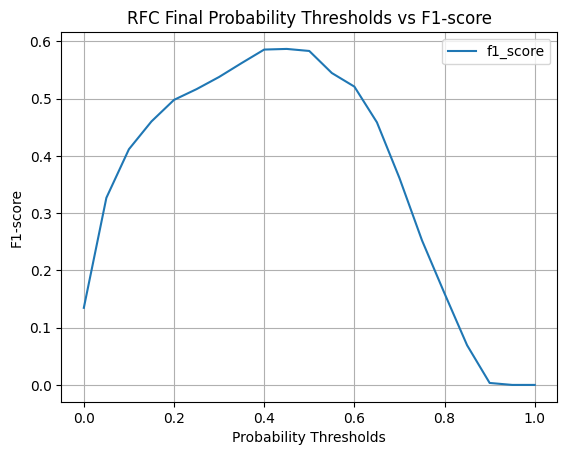

In [ ]:
#Random Forest
thresholds = np.arange(21)*0.05
f1_scores = []

y_proba = rf_tuned.predict_proba(X_test)[:,1]

for thres in thresholds:
    y_pred = np.where(y_proba > thres, 1, 0)
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure()
plt.plot(thresholds, f1_scores, label='f1_score')
plt.xlabel('Probability Thresholds')
plt.ylabel('F1-score')
plt.title('RFC Final Probability Thresholds vs F1-score')
plt.legend()
plt.grid()
plt.show()


The probability thresh hold of 0.4 gives the highest value of F1 Score.

The Random Forest Classifier would be the best model to be used to predict if the customer will subscribe (yes/no) to a term deposit (variable y).

It produced  an F1 score of 58% and 96% for class yes and class no respectively.The model also produces an overall accuracy of 93%.